# Modèle ARIMA

Le modèle ARIMA (AutoRegressive Integrated Moving Average) est une méthode couramment utilisée pour modéliser et prévoir les séries temporelles. Il combine les composantes de l'autorégression (AR) et de la moyenne mobile (MA) avec une différenciation (I) pour prendre en compte les tendances et les comportements saisonniers dans les données.

## Composantes du modèle ARIMA

- **AR (Autorégression)** : L'AR fait référence à la régression linéaire des valeurs actuelles sur les valeurs précédentes de la série temporelle. Il capture les effets de dépendance linéaire à partir des valeurs passées.
- **MA (Moyenne mobile)** : Le MA utilise la moyenne mobile des erreurs précédentes pour modéliser la relation entre les résidus et les observations actuelles de la série temporelle. Il capture les effets de dépendance entre les résidus.
- **I (Différenciation)** : La différenciation est utilisée pour rendre les données stationnaires en supprimant les tendances et les comportements saisonniers. Elle consiste à prendre la différence entre les observations consécutives jusqu'à obtenir une série stationnaire.

## Ordres du modèle ARIMA

Le modèle ARIMA est défini par trois ordres : p, d et q.

- **p (Ordre AR)** : L'ordre AR spécifie le nombre de termes autorégressifs à inclure dans le modèle. Il indique combien de valeurs passées sont utilisées pour prédire la valeur actuelle.
- **d (Ordre de différenciation)** : L'ordre de différenciation indique combien de fois la série doit être différenciée pour rendre les données stationnaires.
- **q (Ordre MA)** : L'ordre MA spécifie le nombre de termes de la moyenne mobile à inclure dans le modèle. Il indique combien de résidus passés sont utilisés pour prédire l'observation actuelle.




## Méthodologie de Box-Jenkins le modèle ARIMA: Selectionner le modèle

La méthodologie de Box-Jenkins est une approche couramment utilisée pour modéliser et prévoir les séries temporelles. Elle comprend les étapes suivantes :

1. **Identification du modèle**

   - Analyse des données : Examiner les données de la série temporelle pour détecter les tendances, les saisonnalités et les comportements anormaux.
   - Différenciation : Si la série temporelle présente une tendance ou une saisonnalité, appliquer une différenciation pour rendre les données stationnaires.
   - Identification des ordres : Utiliser les graphiques ACF (fonction d'autocorrélation) et PACF (fonction d'autocorrélation partielle) pour déterminer les ordres p, d et q du modèle ARIMA.

2. **Estimation du modèle**

   - Estimation des paramètres : Utiliser les méthodes d'estimation (telles que la méthode des moindres carrés) pour estimer les paramètres du modèle ARIMA.

3. **Vérification du modèle**

   - Diagnostic du modèle : Vérifier si les résidus du modèle ARIMA sont bruit blanc (c'est-à-dire s'ils ne présentent pas de structure ou de corrélation significative).
   - Réajustement : Si le modèle ne satisfait pas les critères de bruit blanc, ajuster les ordres du modèle ARIMA et répéter les étapes précédentes.
   - Validation : Valider les performances du modèle en effectuant des prédictions sur des données de validation ou en utilisant des mesures d'évaluation telles que l'erreur quadratique moyenne (RMSE) ou le critère d'information d'Akaike (AIC).

La méthodologie de Box-Jenkins est itérative, ce qui signifie que les étapes d'identification, d'estimation et de vérification peuvent être répétées plusieurs fois pour améliorer le modèle. L'objectif est de trouver le meilleur modèle ARIMA qui capture les motifs et les caractéristiques importantes de la série temporelle, et qui peut être utilisé pour effectuer des prédictions précises.



# Importation des packages

In [64]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
#est pratique pour afficher directement les graphes dans la cellule de sortie.

import warnings
warnings.filterwarnings('ignore') #Indique à Python d'ignorer tous les avertissements.

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


# Présentation de la problématique et chargement des données

# Description de la base de données AirPassengers

La base de données AirPassengers est une série temporelle classique qui représente le nombre mensuel de passagers aériens internationaux. Elle est souvent utilisée comme exemple pour illustrer les modèles de prévision, y compris les modèles ARIMA.


La base de données AirPassengers contient les colonnes suivantes :

- **Month** : La date (mois et année) de chaque observation.
- **Passengers** : Le nombre de passagers aériens internationaux pour chaque mois.


Les données de la base AirPassengers couvrent la période de janvier 1949 à décembre 1960, soit 12 années de données mensuelles.

Vous pouvez télécharger la base de données AirPassengers en utilisant le lien suivant :

[**AirPassengers.csv**](https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv)


In [68]:
df=pd.read_csv("AirPassengers.csv")

In [70]:
#Afficher la base de données
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [72]:
# Renommage de la colonne 
df.rename(columns={'#Passengers':'Passengers'},inplace=True)
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [74]:
# Information sur la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [76]:
# Conversion de la date en datetime
from datetime import datetime
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [78]:
# Verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [80]:
# Mettre la date en index de la table
df.set_index('Month',inplace=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [82]:
# Vérification des valeurs manquante
df.isnull().sum()

Passengers    0
dtype: int64

# Etape 1: Identification du modèle

## Analyse des données

## Représentation graphique

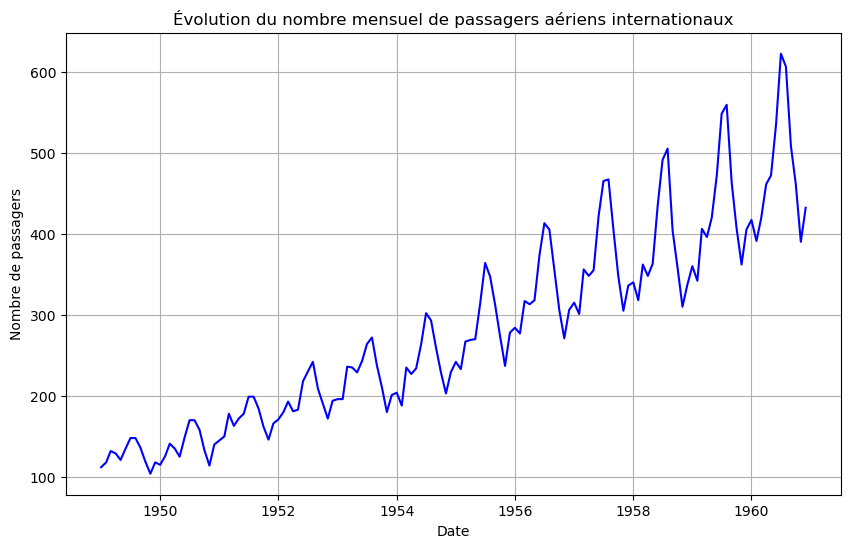

In [84]:
# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], color='blue')
plt.title('Évolution du nombre mensuel de passagers aériens internationaux')
plt.xlabel('Date')
plt.ylabel('Nombre de passagers')
plt.grid(True)
plt.show()

### ACF et PACF

L'ACF (Autocorrelation Function) et la PACF (Partial Autocorrelation Function) sont deux outils essentiels en analyse de séries temporelles. Elles permettent de comprendre les dépendances temporelles dans une série de données.

#### ACF (Autocorrelation Function)

L'ACF mesure la corrélation entre une séquence et elle-même à différentes périodes de temps. Autrement dit, elle permet d'évaluer la similitude entre les observations en fonction du décalage de temps entre elles.

**Pour un décalage 'k', l'ACF mesure la corrélation entre la série temporelle et elle-même décalée de 'k' périodes.**

Par exemple, **une ACF de 0,9 à un décalage de 2 signifie que les données sont très similaires à elles-mêmes il y a deux périodes de temps**.

#### PACF (Partial Autocorrelation Function)

La PACF est une corrélation qui exclut l'effet des termes intermédiaires. C'est-à-dire qu'elle est une mesure de la corrélation entre des observations à un certain intervalle, en tenant compte des valeurs à des intervalles plus courts.

Pour un décalage 'k', **la PACF est la corrélation entre la série temporelle et elle-même décalée de 'k' périodes, mais après avoir soustrait les effets des décalages 1 à 'k-1'**.

Par exemple, une PACF de 0,5 à un décalage de 3 signifie que les données sont moyennement similaires à elles-mêmes il y a trois périodes de temps, après avoir pris en compte les décalages 1 et 2.

#### Utilisations

Les graphiques ACF et PACF sont couramment utilisés pour aider à choisir les paramètres d'un modèle ARIMA en analyse de séries temporelles. Par exemple, **le graphique ACF peut être utilisé pour identifier le terme MA (moyenne mobile)** du modèle, tandis que le graphique **PACF peut aider à identifier le terme AR (auto-régressif).**


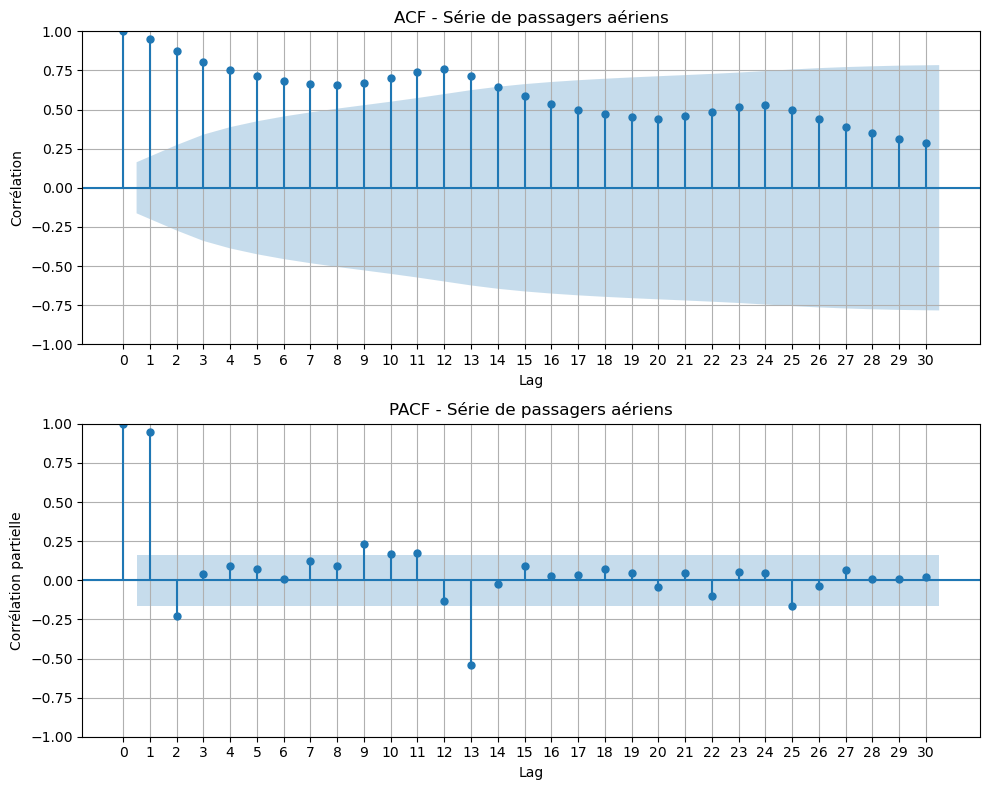

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(df['Passengers'], lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de passagers aériens')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(df['Passengers'], lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de passagers aériens')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

In [33]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(df)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | 0.8153688792060597            |
| P-valeur       | 0.9918802434376411            |
| Conclusion     | La série est non stationnaire |


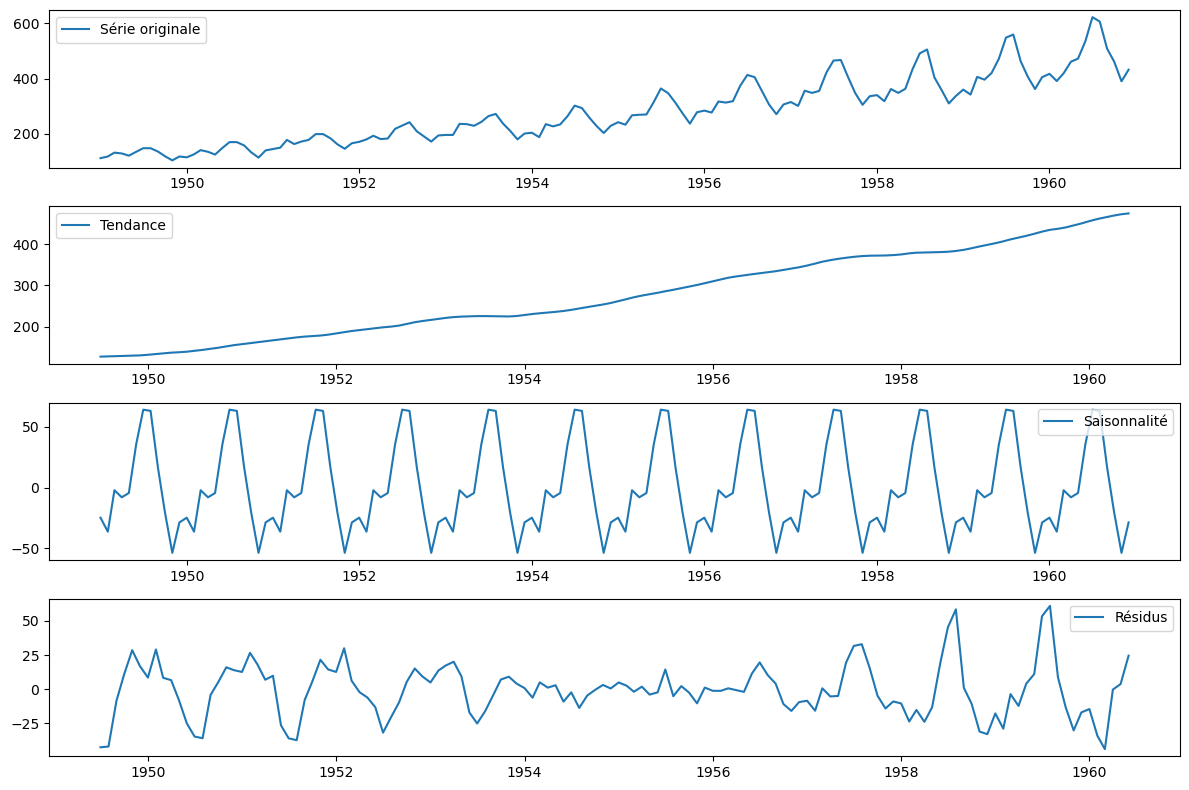

In [88]:
# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(df['Passengers'], model='additive')

# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Passengers'], label='Série originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

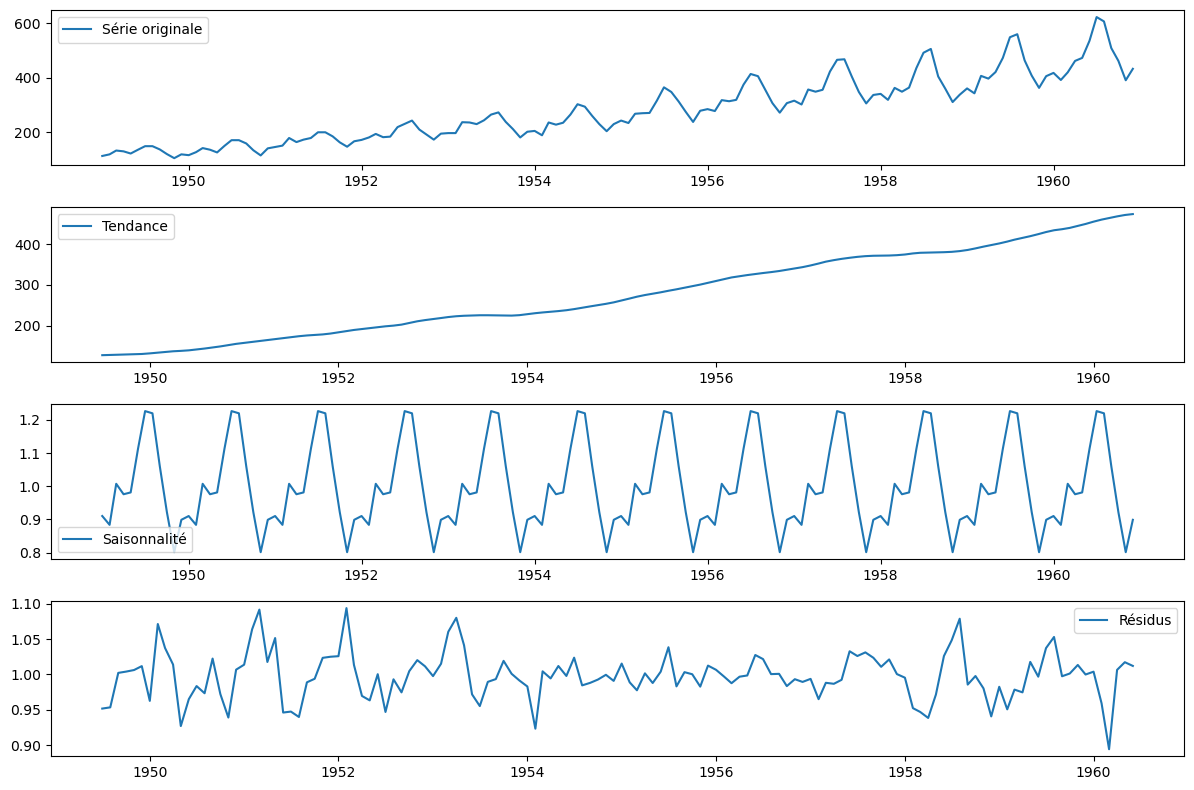

In [90]:
# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Passengers'], label='Série originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## Différentciation (Stationnarisation)

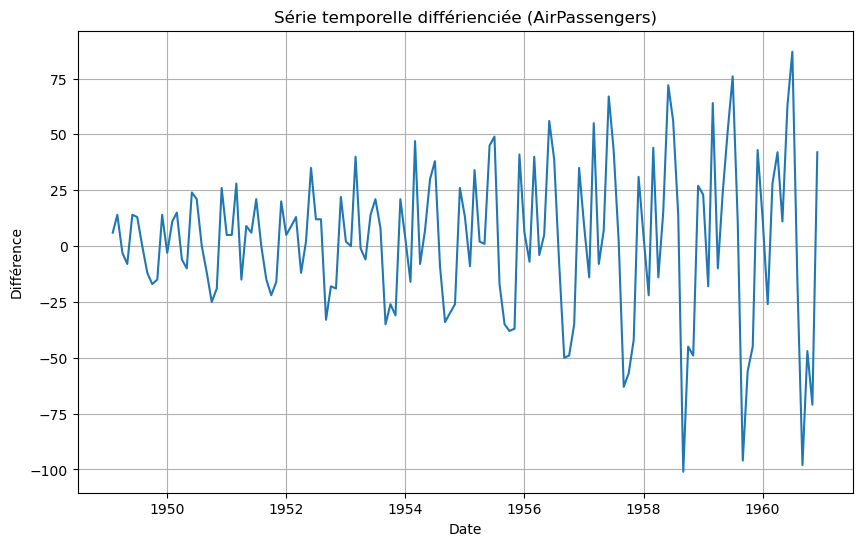

In [92]:

# Différenciation pour rendre la série stationnaire
differenced = df['Passengers'].diff().dropna()

# Afficher la série différienciée
plt.figure(figsize=(10, 6))
plt.plot(differenced)
plt.title('Série temporelle différienciée (AirPassengers)')
plt.xlabel('Date')
plt.ylabel('Différence')
plt.grid(True)
plt.show()


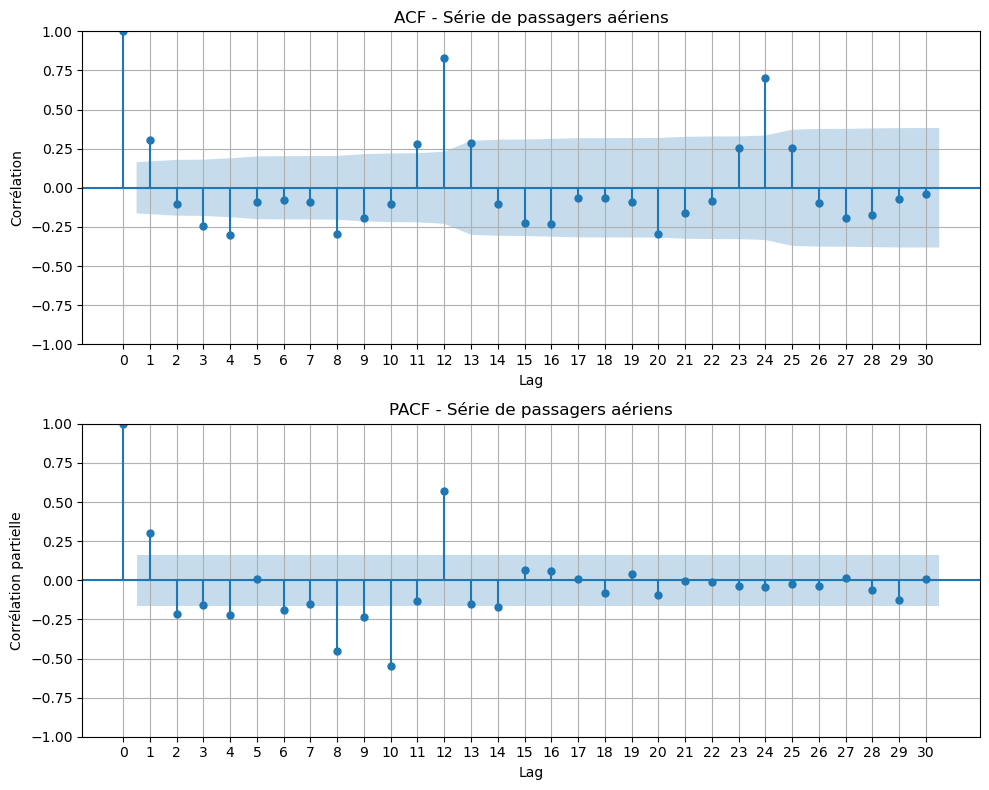

In [94]:
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(differenced, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de passagers aériens')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(differenced, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de passagers aériens')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

In [44]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(differenced)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | -2.829266824169992            |
| P-valeur       | 0.0542132902838265            |
| Conclusion     | La série est non stationnaire |


## Identification de l'ordre p,d,q

In [48]:
p=2
d=1
q=1,3

In [96]:
# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = df['Passengers'][:-15]
test_data = df['Passengers'][-15:]

# Estimation du modèle

In [99]:
from statsmodels.tsa.arima.model import ARIMA

# Créer un modèle ARIMA(2,1,1)
model = ARIMA(train_data, order=(2,1,1))

# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -604.753
Date:                Tue, 25 Feb 2025   AIC                           1217.507
Time:                        13:53:10   BIC                           1228.915
Sample:                    01-01-1949   HQIC                          1222.142
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0810      0.105     10.263      0.000       0.875       1.287
ar.L2         -0.4722      0.102     -4.641      0.000      -0.672      -0.273
ma.L1         -0.8445      0.094     -8.981      0.0

# Vérification du modèle



Après avoir ajusté un modèle ARIMA, il est crucial de vérifier les résidus du modèle pour s'assurer de la qualité de l'ajustement. Les résidus sont la différence entre les valeurs observées et les valeurs prédites par le modèle. Si le modèle est bien ajusté, les résidus doivent se comporter comme un bruit blanc, c'est-à-dire être une série temporelle aléatoire à distribution normale, avec une moyenne de zéro et sans autocorrélation. Voici quelques points clés à vérifier :

## Test de Ljung-Box

Le test de Ljung-Box teste l'absence d'autocorrélation dans les résidus. Nous voulons que les résidus soient indépendants les uns des autres. Une faible valeur p (p < 0,05) indique une preuve d'autocorrélation.

## Hétéroscédasticité

L'hétéroscédasticité se réfère à la situation dans laquelle la variabilité de l'erreur de prédiction (ou résidu) n'est pas constante à travers toutes les observations. Nous préférons avoir une erreur de prédiction constante, donc la vérification de l'hétéroscédasticité est importante. Un bon modèle devrait présenter une homoscédasticité, c'est-à-dire une variance constante des résidus.

## Normalité

L'aspect de normalité fait référence à la distribution des résidus. Dans un bon modèle, nous attendons que les résidus suivent une distribution normale. Pour vérifier cela, nous pouvons utiliser un graphique Q-Q ou effectuer un test statistique, comme le test de Shapiro-Wilk, pour vérifier la normalité.

## Graphiques des résidus

En plus des tests statistiques, il est utile de tracer les résidus au fil du temps, ainsi que leur autocorrélation (ACF et PACF), pour vérifier visuellement les suppositions précédentes. Dans un modèle bien ajusté, les résidus devraient ressembler à un bruit blanc lorsqu'ils sont tracés dans le temps, et l'ACF et le PACF devraient montrer peu ou pas de corrélation significative.

Rappelez-vous, aucun modèle n'est parfait, et tous ces tests et graphiques sont des outils pour vous aider à comprendre si votre modèle est "suffisamment bon" pour répondre à vos besoins spécifiques.


<Figure size 1000x500 with 0 Axes>

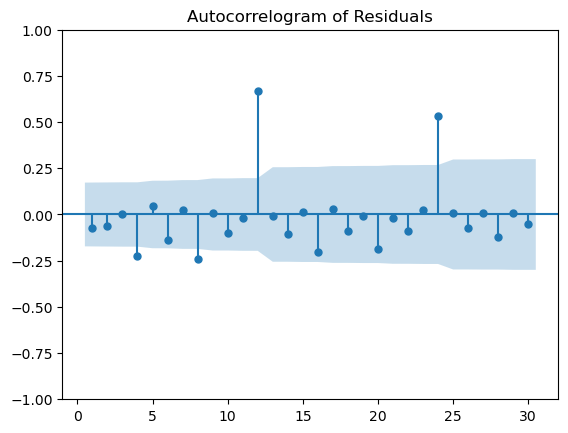

<Figure size 1000x500 with 0 Axes>

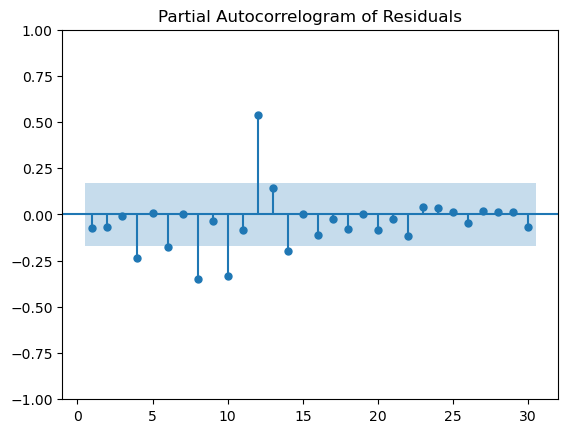

In [101]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les résidus
residuals = model_fit.resid

# Tracer l'ACF des résidus
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=30, zero=False)
plt.title("Autocorrelogram of Residuals")
plt.show()

# Tracer la PACF des résidus
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=30, zero=False)
plt.title("Partial Autocorrelogram of Residuals")
plt.show()


# Prédiction

In [1]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #ui mesure la qualité des prédictions.
# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))

plt.xlabel('Date')
plt.ylabel('Passagers')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.show()

NameError: name 'model_fit' is not defined

In [105]:
# Mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_predictions)
train_mse = mean_squared_error(train_data, train_predictions)
train_rmse = mean_squared_error(train_data, train_predictions, squared=False)
train_r2 = r2_score(train_data, train_predictions)

# Mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, test_predictions)
test_mse = mean_squared_error(test_data, test_predictions)
test_rmse = mean_squared_error(test_data, test_predictions, squared=False)
test_r2 = r2_score(test_data, test_predictions)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)

  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                22.183944         54.144213
1      MSE               830.835014       6510.318948
2     RMSE                28.824209         80.686548
3       R²                 0.925421         -0.148361


# Modèle automatique

In [114]:
!pip install pmdarima


  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached Cython-3.0.12-cp313-cp313-win_amd64.whl.metadata (3.6 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached Cython-3.0.12-cp313-cp313-win_amd64.whl (2.8 M

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [41 lines of output]
  Partial import of pmdarima during the build process.
  
  Requirements: ['joblib>=0.11\nCython>=0.29,!=0.29.18,!=0.29.31\nnumpy>=1.21.2\npandas>=0.19\nscikit-learn>=0.22\nscipy>=1.3.2\nstatsmodels>=0.13.2\nurllib3\nsetuptools>=38.6.0,!=50.0.0\npackaging>=17.1  # Bundled with setuptools, but want to be explicit\n']
  Adding extra setuptools args
  Setting up with setuptools
  Traceback (most recent call last):
    File "C:\Users\Joelle JREIS\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
      ~~~~^^
    File "C:\Users\Joelle JREIS\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Joel

In [115]:
import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = df['Passengers'][:-15]
test_data = df['Passengers'][-15:]

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())

ModuleNotFoundError: No module named 'pmdarima'

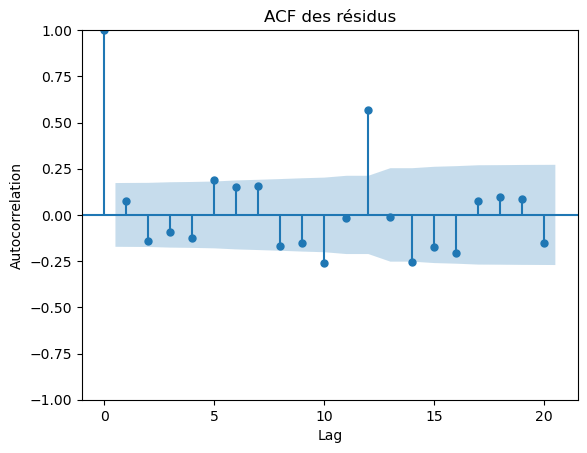

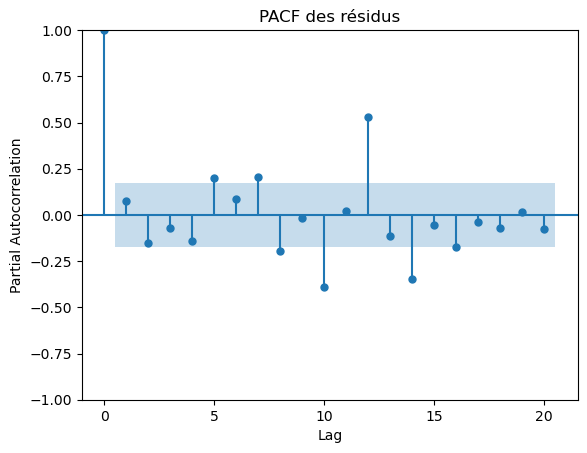

In [23]:
# Ajuster le modèle aux données
model.fit(train_data)
# Obtenir les résidus du modèle
residuals = model.resid()

# Tracer la fonction d'autocorrélation (ACF) des résidus
plot_acf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF des résidus')
plt.show()

# Tracer la fonction d'autocorrélation partielle (PACF) des résidus
plot_pacf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF des résidus')
plt.show()

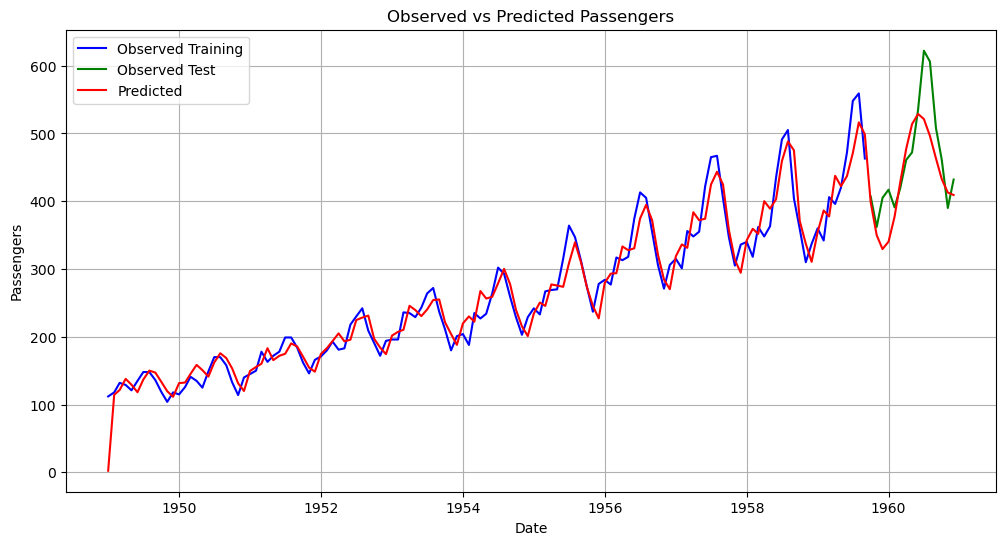

In [24]:

# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Observed vs Predicted Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Calculer les mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_pred)
train_mse = mean_squared_error(train_data, train_pred)
train_rmse = mean_squared_error(train_data, train_pred, squared=False)
train_r2 = r2_score(train_data, train_pred)

# Calculer les mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, predicted)
test_mse = mean_squared_error(test_data, predicted)
test_rmse = mean_squared_error(test_data, predicted, squared=False)
test_r2 = r2_score(test_data, predicted)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)




  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                19.581814         39.311028
1      MSE               656.693909       2679.985252
2     RMSE                25.626040         51.768574
3       R²                 0.941052          0.527275


# Quiz

### Quiz sur le modèle ARIMA en Python

**Question 1: Qu'est-ce que ARIMA signifie en termes de modélisation de séries chronologiques?**


a) Autoregressive Integrated Moving Average

b) Auto Regression Inverse Moving Average

c) Adaptive Recursive Integrated Moving Average

d) All-inclusive Regression for Integrated Moving Averages


**Question 2: Comment peut-on sélectionner les ordres p, d, q pour un modèle ARIMA ?**

a) Par la méthode de Box-Jenkins

b) En utilisant la méthode de l'erreur absolue moyenne

c) Par le calcul des coefficients de corrélation

d) En utilisant uniquement les ordres p et q comme paramètres


**Question 3: Comment évalue-t-on les performances d'un modèle ARIMA ?**

a) En utilisant le coefficient de corrélation

b) En calculant l'erreur absolue moyenne (MAE)

c) En comparant les prédictions avec les données réelles

d) Toutes les réponses ci-dessus


**Question 4: Que signifie un bruit blanc dans les résidus d'un modèle ARIMA ?**


a) Les résidus sont non autocorrélé, homoscédastique et normalement distribuée

b) Les résidus ont une autocorrélation significative aux lags non nuls

c) Les résidus ont une variance croissante avec le temps